## Software Packages

We will be using a wide range of different R software packages. To install and manage these packages we will be using the Conda environment manager. The following is a list of packages we will routinely use in lectures and homeworks:

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
majors = readr::read_csv(file = '../data/lec01/majors.csv', show_col_types = FALSE)
names = readr::read_csv(file = '../data/lec01/names.csv', show_col_types = FALSE)

In [10]:
majors %>% head(n = 20)
names %>% head()

Majors,Terms in Attendance
<chr>,<chr>
Letters & Sci Undeclared UG,3
Data Science BA,7
Economics BA,8
Letters & Sci Undeclared UG,5
Economics BA,7
"Computer Science BA, Economics BA",7
"Business Administration BS, Letters & Sci Undeclared UG",5
Letters & Sci Undeclared UG,5
Microbial Biology BS,5


Name,Role
<chr>,<chr>
emily,Student
zoe,Student
michelle,Student
james,Student
jenny,Student
james,Student


In [7]:
names <- names %>% mutate(Name = tolower(Name))

In [9]:
names %>% head()

Name,Role
<chr>,<chr>
emily,Student
zoe,Student
michelle,Student
james,Student
jenny,Student
james,Student


In [13]:
first_letter <- names %>%
  count(first_letter = str_sub(`Name`, 1, 1), sort = TRUE,) %>% 
  mutate(first_letter = factor(first_letter, levels = first_letter))
first_letter  %>% head()

first_letter,n
<fct>,<int>
a,192
j,137
s,130
m,97
e,72
c,68


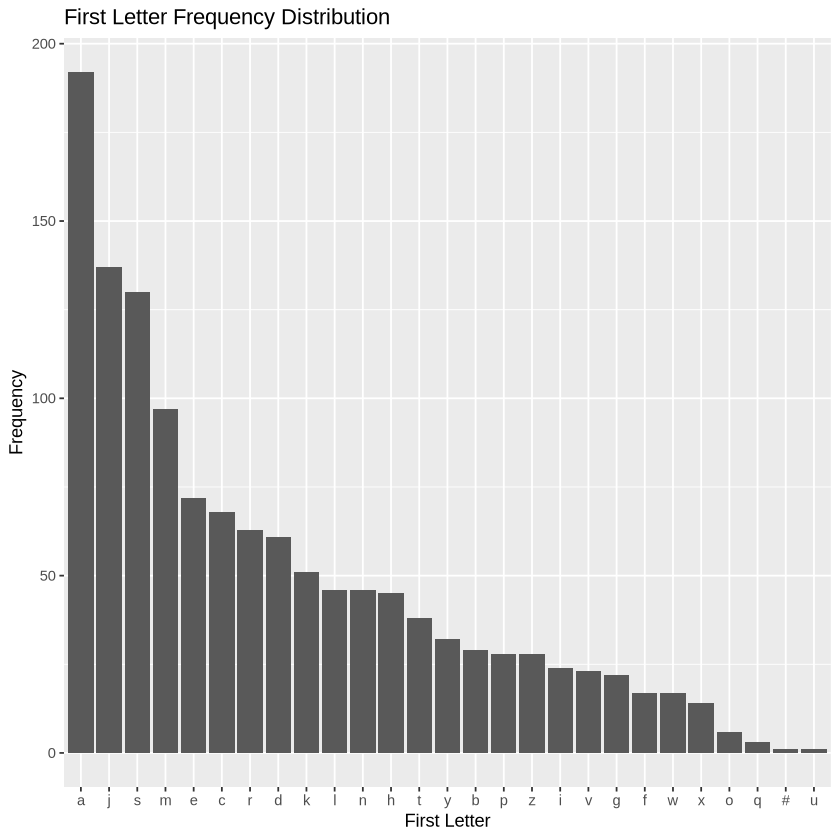

In [14]:
ggplot(first_letter, aes(x = first_letter, y = n)) +
  geom_bar(stat = "identity") +
  xlab('First Letter') +
  ylab('Frequency') +
  ggtitle('First Letter Frequency Distribution')

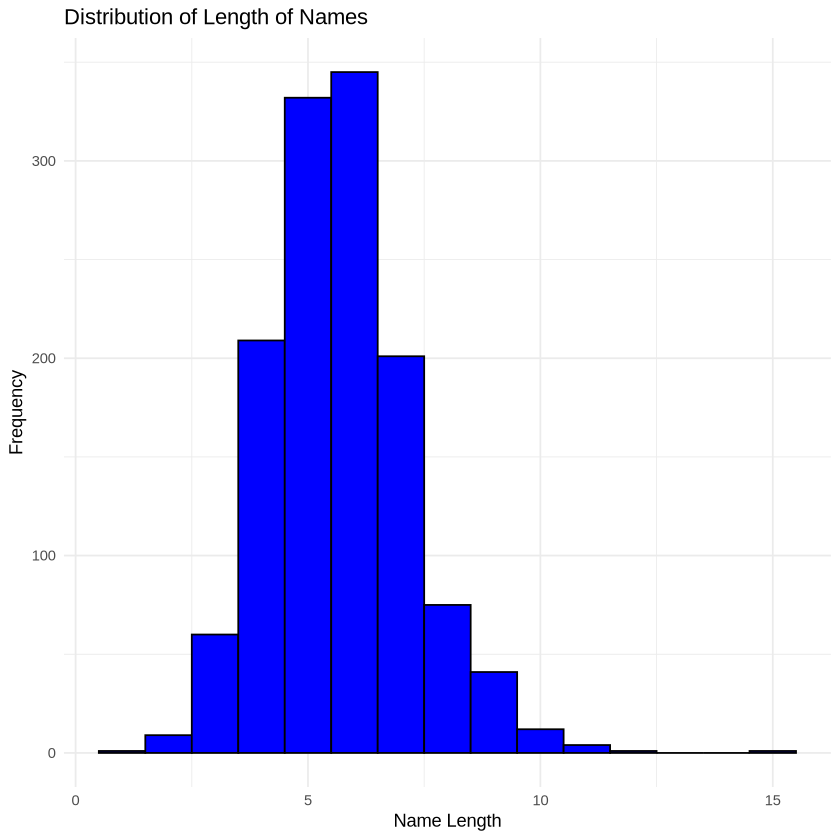

In [16]:
ggplot(names, aes(x = str_length(Name))) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Distribution of Length of Names", x = "Name Length", y = "Frequency") +
  theme_minimal()

In [63]:
names %>% count(Role)

Role,n
<chr>,<int>
#REF!,1
Student,1290


In [17]:
names  <- names %>% subset(Role != '#REF!')

In [18]:
names %>% count(Role)

Role,n
<chr>,<int>
Student,1290


In [71]:
majors %>% count(`Terms in Attendance`)

Terms in Attendance,n
<chr>,<int>
#REF!,1
3,171
4,8
5,539
6,22
7,351
8,75
G,124


In [19]:
majors  <- majors %>% subset(`Terms in Attendance` != '#REF!')

In [20]:
majors %>% count(`Terms in Attendance`)

Terms in Attendance,n
<chr>,<int>
3,171
4,8
5,539
6,22
7,351
8,75
G,124


In [74]:
summary(names)

     Name               Role          
 Length:1290        Length:1290       
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [75]:
summary(majors)

    Majors          Terms in Attendance
 Length:1290        Length:1290        
 Class :character   Class :character   
 Mode  :character   Mode  :character   

In [44]:
majors_count = majors %>% count(Majors) %>% arrange(desc(n)) %>% head(n=20)

In [45]:
majors_count

Majors,n
<chr>,<int>
Letters & Sci Undeclared UG,353
Data Science BA,129
Computer Science BA,124
Electrical Eng & Comp Sci BS,69
Economics BA,65
Cognitive Science BA,29
Electrical Eng & Comp Sci MEng,25
Applied Mathematics BA,24
Civil Engineering BS,22


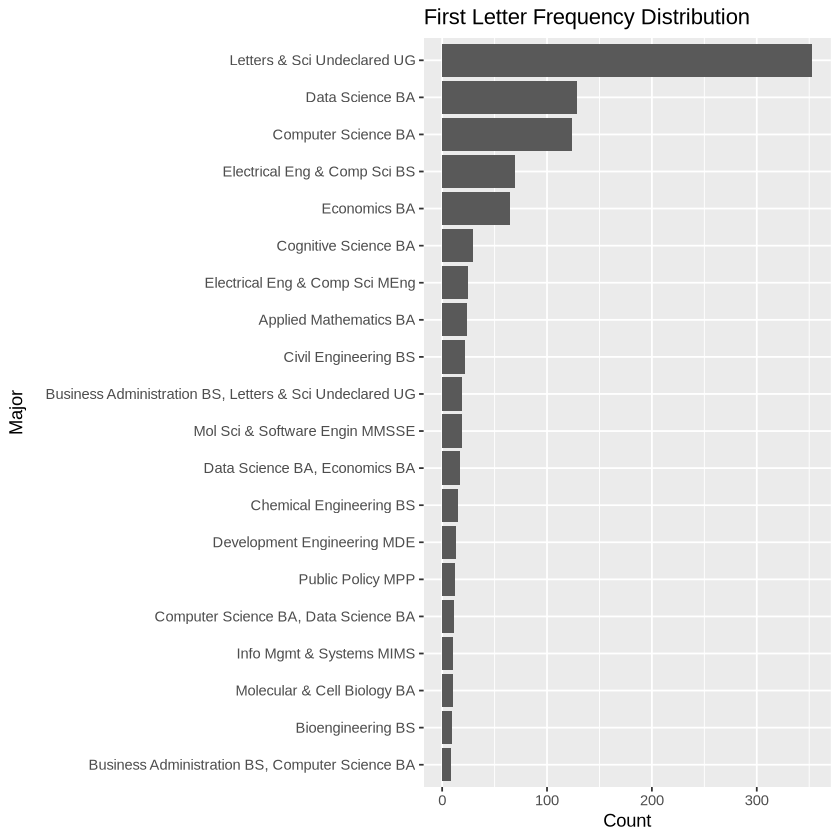

In [47]:
ggplot(majors_count, aes(x = factor(Majors, levels = rev(Majors)), y = n)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  xlab('Major') +
  ylab('Count') +
  ggtitle('First Letter Frequency Distribution')

In [49]:
majors <- majors %>% 
    mutate(`Terms in Attendance` = if_else(`Terms in Attendance` != 'G','Undergraduate', 'Graduate'))

In [58]:
majors <- majors %>% rename(`Ungrad Grad` = `Terms in Attendance`)

In [59]:
majors %>% count(`Ungrad Grad`)

Ungrad Grad,n
<chr>,<int>
Graduate,124
Undergraduate,1166


## UC Berkeley Student Headcount by Major and Demographics

In [60]:
university_majors = readr::read_csv(file = '../data/lec01/data.csv', show_col_types = FALSE)
university_majors = university_majors[, c('Academic Yr', 'Semester', 'Ungrad Grad', 
                                           'Entry Status', 'Major Short Nm', 'Student Headcount')]

New names:
• `` -> `...11`


In [82]:
university_majors %>% head()

Academic Yr,Ungrad Grad,Entry Status,Major Short Nm,Student Headcount
<chr>,<chr>,<chr>,<chr>,<dbl>
2014-15,Graduate,Graduate,African American Studies,30.0
2014-15,Graduate,Graduate,Ag & Resource Economics,73.5
2014-15,Graduate,Graduate,Anc Hist & Medit Archae,14.0
2014-15,Graduate,Graduate,Anthropology,76.5
2014-15,Graduate,Graduate,Applied Mathematics,18.5
2014-15,Graduate,Graduate,Applied Science & Tech,42.5


In [64]:
university_majors <- university_majors  %>% 
    group_by(`Academic Yr`, `Ungrad Grad`, `Entry Status`, `Major Short Nm`)  %>% 
    summarise(`Student Headcount` = mean(`Student Headcount`))

`summarise()` has grouped output by 'Academic Yr', 'Ungrad Grad', 'Entry
Status'. You can override using the `.groups` argument.


In [65]:
university_majors %>% head()

Academic Yr,Ungrad Grad,Entry Status,Major Short Nm,Student Headcount
<chr>,<chr>,<chr>,<chr>,<dbl>
2014-15,Graduate,Graduate,African American Studies,30.0
2014-15,Graduate,Graduate,Ag & Resource Economics,73.5
2014-15,Graduate,Graduate,Anc Hist & Medit Archae,14.0
2014-15,Graduate,Graduate,Anthropology,76.5
2014-15,Graduate,Graduate,Applied Mathematics,18.5
2014-15,Graduate,Graduate,Applied Science & Tech,42.5


In [66]:
university_grad_vs_ungrd  <- university_majors %>% 
    group_by(`Academic Yr`, `Ungrad Grad`) %>% 
    summarise(`Student Headcount` = sum(`Student Headcount` ))

`summarise()` has grouped output by 'Academic Yr'. You can override using the
`.groups` argument.


In [74]:
proportions = university_grad_vs_ungrd %>% 
    pivot_wider(names_from = `Ungrad Grad`,
                values_from = `Student Headcount`) %>% 
    mutate(Total = Undergraduate + Graduate) %>% 
    mutate(`Undergrad Proportion` = Undergraduate / Total) %>% 
    mutate(`Grad Proportion` = Graduate / Total)

In [76]:
proportions %>% head()

Academic Yr,Graduate,Undergraduate,Total,Undergrad Proportion,Grad Proportion
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-15,10434.0,28595.0,39029.0,0.7326603,0.2673397
2015-16,10681.0,28818.0,39499.0,0.7295881,0.2704119
2016-17,10908.5,30132.0,41040.5,0.7342016,0.2657984
2017-18,11446.0,31581.0,43027.0,0.7339810,0.2660190
2018-19,11768.5,32219.5,43988.0,0.7324611,0.2675389
2019-20,11920.0,32896.0,44816.0,0.7340236,0.2659764


In [77]:
proportions_long <- proportions %>%
  pivot_longer(cols = Graduate:Undergraduate,
               names_to = 'Ungrad Grad', 
               values_to = 'Student Headcount')

In [94]:
proportions_long %>% head()

Academic Yr,Total,Undergrad Proportion,Grad Proportion,Ungrad Grad,Student Headcount
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2014-15,39029.0,0.7326603,0.2673397,Graduate,10434.0
2014-15,39029.0,0.7326603,0.2673397,Undergraduate,28595.0
2015-16,39499.0,0.7295881,0.2704119,Graduate,10681.0
2015-16,39499.0,0.7295881,0.2704119,Undergraduate,28818.0
2016-17,41040.5,0.7342016,0.2657984,Graduate,10908.5
2016-17,41040.5,0.7342016,0.2657984,Undergraduate,30132.0


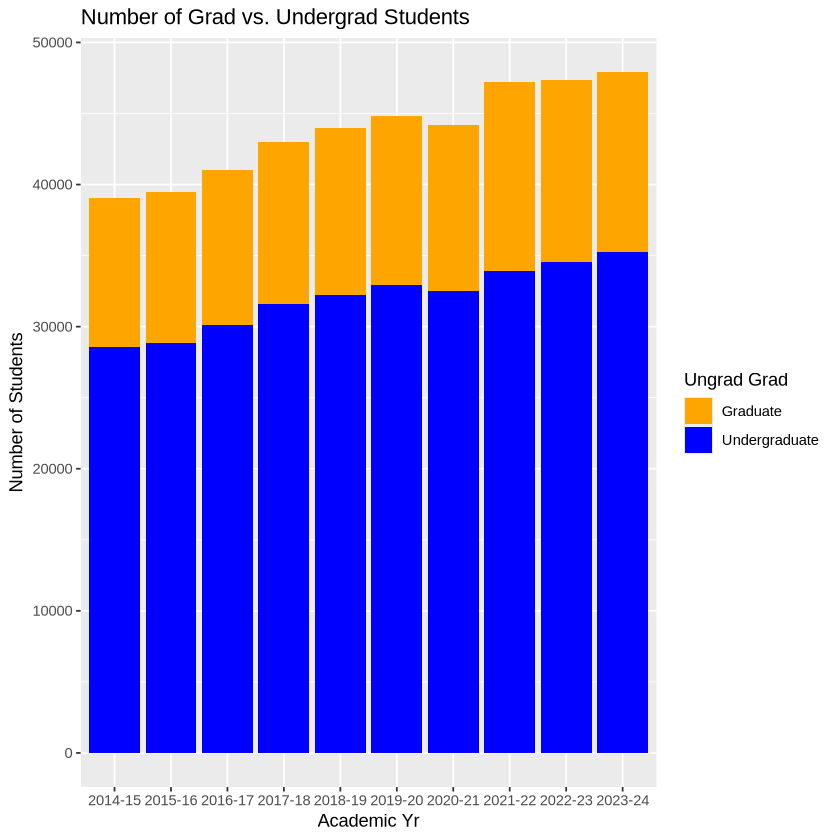

In [81]:
ggplot(proportions_long, aes(x = `Academic Yr`, y = `Student Headcount`, fill = `Ungrad Grad`)) +
  geom_bar(stat = 'identity', position = 'stack') +
    scale_fill_manual(values = c('Undergraduate' = 'blue', 'Graduate' = 'orange')) +
    labs(title = "Number of Grad vs. Undergrad Students", y = 'Number of Students')

## 4.1. Ratio between graduate and undergraduate students in Data 100, and its comparison with campus distribution

In [93]:
data100_grad  <- majors %>% 
    subset(`Ungrad Grad` == 'Graduate')  %>% 
    count()

data100_undergrad  <- majors %>% 
    subset(`Ungrad Grad` == 'Undergraduate')  %>% 
    count()

print(paste("Number of graduate students in Data 100: ", as.integer(data100_grad)))
print(paste("Number of undergraduate students in Data 100: ", as.integer(data100_undergrad)))

[1] "Number of graduate students in Data 100:  124"
[1] "Number of undergraduate students in Data 100:  1166"


In [95]:
proportions_long <- proportions %>%
  pivot_longer(cols = `Undergrad Proportion`:`Grad Proportion`,
               names_to = 'Ungrad Grad', 
               values_to = 'Student Proportion')

In [96]:
proportions_long %>% head()

Academic Yr,Graduate,Undergraduate,Total,Ungrad Grad,Student Proportion
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2014-15,10434.0,28595,39029.0,Undergrad Proportion,0.7326603
2014-15,10434.0,28595,39029.0,Grad Proportion,0.2673397
2015-16,10681.0,28818,39499.0,Undergrad Proportion,0.7295881
2015-16,10681.0,28818,39499.0,Grad Proportion,0.2704119
2016-17,10908.5,30132,41040.5,Undergrad Proportion,0.7342016
2016-17,10908.5,30132,41040.5,Grad Proportion,0.2657984


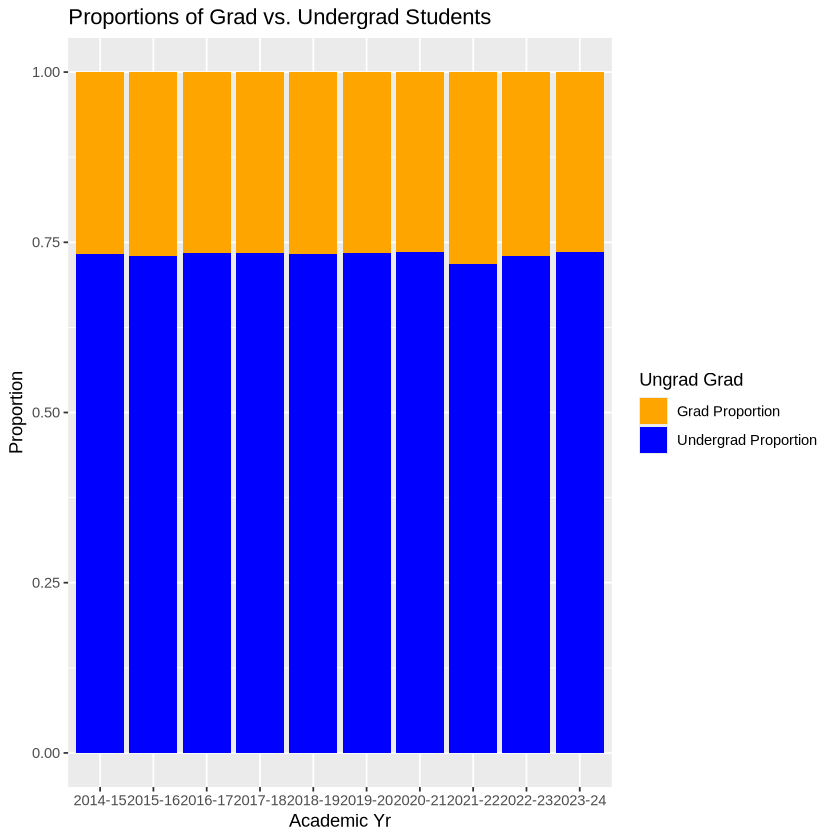

In [97]:
ggplot(proportions_long, aes(x = `Academic Yr`, y = `Student Proportion`, fill = `Ungrad Grad`)) +
  geom_bar(stat = 'identity', position = 'stack') +
    scale_fill_manual(values = c('Undergrad Proportion' = 'blue', 'Grad Proportion' = 'orange')) +
    labs(title = "Proportions of Grad vs. Undergrad Students", y = 'Proportion')

## 4.2. Proportion of different majors in Data 100, and their historical emrollment trends

In [99]:
major_trends <- university_majors %>% 
group_by(`Academic Yr`, `Major Short Nm`) %>% 
summarise(`Student Headcount` = sum(`Student Headcount`))

`summarise()` has grouped output by 'Academic Yr'. You can override using the
`.groups` argument.


In [102]:
major_trends %>% 
subset(`Academic Yr` == '2022-23') %>% 
arrange(desc(`Student Headcount`)) %>% head(n=20)

Academic Yr,Major Short Nm,Student Headcount
<chr>,<chr>,<dbl>
2022-23,Letters & Sci Undeclared,10651.0
2022-23,CDSS Computer Science,2102.5
2022-23,Electrical Eng & Comp Sci,2093.0
2022-23,Business Administration,1645.5
2022-23,Economics,1579.5
2022-23,Data Science Undergrad Studies,1325.5
2022-23,Molecular & Cell Biology,1225.5
2022-23,Mechanical Engineering,1208.0
2022-23,Law (JD),1023.0


In [103]:
print("Top 20 majors at Berkeley since 2013")
major_trends %>% 
group_by(`Major Short Nm`) %>% 
summarise(`Student Headcount` = sum(`Student Headcount`)) %>% 
arrange(desc(`Student Headcount`)) %>% head(n=20)

[1] "Top 20 majors at Berkeley since 2013"


Major Short Nm,Student Headcount
<chr>,<dbl>
Letters & Sci Undeclared,102315.5
Electrical Eng & Comp Sci,18979.5
CDSS Computer Science,16345.5
Business Administration,14680.5
Economics,14268.5
Mechanical Engineering,10436.5
Political Science,10343.5
Law (JD),9820.0
Evening & Weekend MBA,8138.0


In [156]:
data100_top_20_majors <- majors %>% 
mutate(Majors = str_split(Majors, ' ') %>% map_chr(function(x){paste(head(x, -1), collapse = " ")})) %>% 
count(Majors, sort = T) %>% head(n=20)

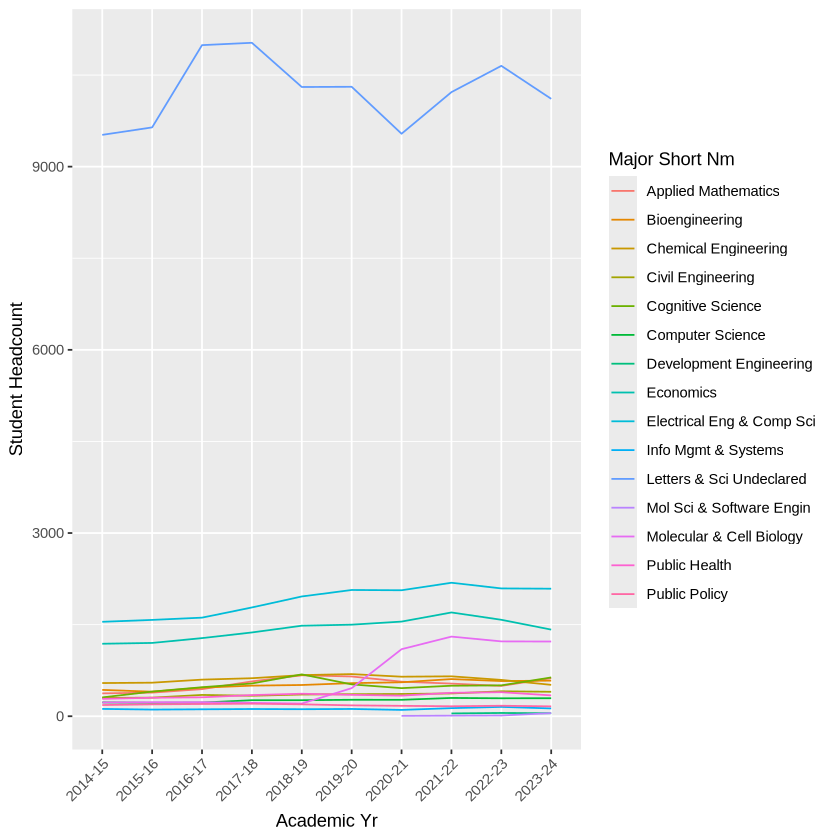

In [157]:
major_trends %>%
subset(`Major Short Nm` %in% data100_top_20_majors$Majors) %>% 
ggplot(aes(x = `Academic Yr`, y = `Student Headcount`, color = `Major Short Nm`, group = `Major Short Nm`)) +
geom_line() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))  # 旋转x轴标签以提高可读性

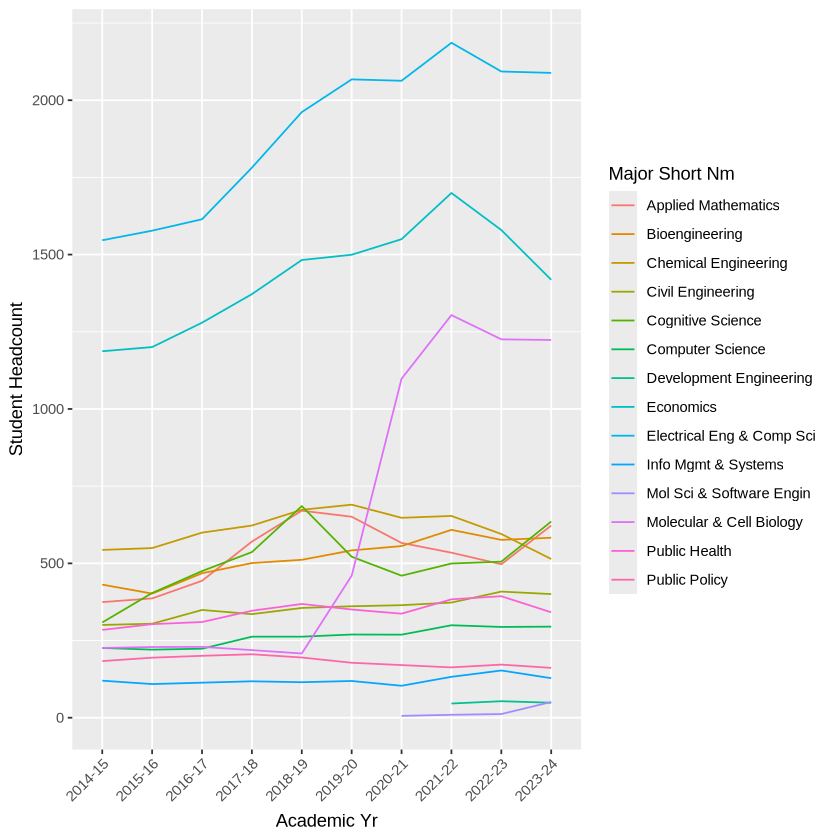

In [158]:
major_trends %>%
subset(`Major Short Nm` %in% (data100_top_20_majors$Majors[-1])) %>% 
ggplot(aes(x = `Academic Yr`, y = `Student Headcount`, color = `Major Short Nm`, group = `Major Short Nm`)) +
geom_line() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))  # 旋转x轴标签以提高可读性